<center>
<div class="h1">Info 114: Introduction to Data Science</div>
<div class="h1">Homework 3: from VI-ME-BA-BAR to POM</div>
</center>

# Part 2: Data Analysis
We have now 4 datasets:
- one with only 2 features (<b>R</b>edness and <b>E</b>longation) called <b>RE_data.csv</b>
- one with only 21 features (<b>C</b>olor and <b>S</b>hape features) called <b>CS_data.csv</b>
- one with 14580 features (all pixels of 81x69x3 <b>raw</b> images) called <b>RAW_data.csv</b>
- one with 3072 features (all pixels of 32x32x3 <b>crop</b>ped images) called <b>CROP_data.csv</b>.

We will compare the performances of various classifiers on those 4 datasets. Thus, we are going to start doing "real" POM: Probability, Optimization, and Modeling. We will proceed in a "greedy" way, eliminating some non promising avenues as we go, and not revisiting them for the moment:

1. Which dataset version should we keep? Should we or not scale variables (using variable standardization)?
2. Which learning machine of a standard toolkit (scikit-learn) is most promising?

## Setup

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import our own code
code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *

## Step 1: Select data representation
Which dataset version should we keep? Should we do or not a variable standardization?

<u>Question 0.1</u> List all the datasets in directory `data_dir = "./mini-dataset/"` and call the resulting list `data_list`.

<u>Question 0.2</u> Call `check_datasets(data_list)` to view some statistics on the datasets. If you want to check how this code is written, type `??check_datasets(data_list)``.

In [3]:
# Import our own code
code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *

In [4]:
# Answer to question 0.1
# List the datasets
data_dir = './mini-dataset/'
data_list = ls(data_dir + '*_data.csv')
data_list

['./mini-dataset/RAW_data.csv',
 './mini-dataset/RE_data.csv',
 './mini-dataset/CS_data.csv',
 './mini-dataset/CROP_data.csv']

In [5]:
# Answer to question 0.2
# Check the dataset sizes
check_datasets(data_list)

,Dataset,num. examples,num. features,num. apples,num. bananas
0,RAW,491,14581,333,158
1,RE,491,3,333,158
2,CS,491,22,333,158
3,CROP,491,3073,333,158


### Question 1: Pandas 
#### Load, visualize, and preprocess data
In previous classes we have leaned about `numpy arrays`. It is time now to learn about `pandas dataframes`. Those are also arrays, but a different kind of python objects, with more properties, supporting fancy database functions and having quite a few display functions and nice simple summary statistics, check the documentation. 

<u>Question 1.0</u> In an editor, open `RL_data.csv` or another of the dataset files to see how it looks like. The dataset is formatted in the CSV format (comma separated file). The examples are in lines and the features are separated by commas. The first line is the header. You may also make a call to a UNIX command to view the first few lines of the file.

<u>Question 1.1</u> Load `RL_data.csv` as a pandas dataframe called `df`. Show the first few lines using the method `head`.

<u>Question 1.2</u> Compute simple statistics using the method `describe`.

<u>Question 1.3</u> Imagine that you do now know how to make a heat map (or you do not remember). Think of using a search engine, type the keywords: "pandas heatmap". I found <a href="https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe">this post</a>, for instance. Now find a way of showing the dataset as a heat map.

<u>Question 1.4</u> You remember that it is often useful to `standardize` the columns of the data matrix to put them all on thre same scale. Change your dataframe `df` to `df_scaled` by subtracting the mean of all columns and dividing by the standard deviation. Perform again the steps of questions 1.1, 1.2, and 1.3. What do you notice?

<u>Question 1.5</u> Write a function that takes as input a data frame `df` containing a dataset and returns a dataframe `df_scaled` with the columns standardized <b>EXCEPT THE TARGET VALUES</b> of the last column. Use this template for your code:

    def standardize_df(df):
    '''Standardize all the columns except the last one (target values).'''
    # YOUR CODE HERE
    return df_scaled
    
Test your function with the same dataframe as in the previous questions and use the methods `head` and `describe` to verify that all the columns are standardized, except the last one.

In [6]:
# Answer to question 1.0
!head ./mini-dataset/RE_data.csv

redness,elongation,fruit
8.429611650485437,1.4032012759326986,1.0
42.89607843137255,1.7032009898154288,1.0
56.354066985645936,1.5508105645577395,1.0
-10.528846153846153,1.7773426521360935,1.0
-17.131386861313867,2.047174441534352,1.0
36.041666666666664,1.4139561143744013,1.0
34.744932432432435,1.2379057682280559,1.0
1.8179190751445087,1.0839275628229141,1.0
3.34106529209622,1.0972000640347488,1.0


In [7]:
# Answer to question 1.1
df = pd.read_csv(os.path.join(data_dir, 'RE_data.csv'))
df.head()

,redness,elongation,fruit
0,8.429612,1.403201,1.0
1,42.896078,1.703201,1.0
2,56.354067,1.550811,1.0
3,-10.528846,1.777343,1.0
4,-17.131387,2.047174,1.0


In [8]:
# Answer to question 1.2
df.describe()

,redness,elongation,fruit
count,491.000000,491.000000,491.000000
mean,17.863426,1.468878,0.356415
std,21.805386,0.521078,0.935280
min,-47.045455,1.000000,-1.000000
25%,3.895620,1.161664,-1.000000
50%,14.380952,1.300111,1.000000
75%,33.848108,1.598103,1.000000
max,100.364865,5.231697,1.000000


In [9]:
# Answer to question 1.3
df.style.background_gradient(cmap='Blues')
# This way of creating heat maps is pretty cool, we do not need to standardize features

,redness,elongation,fruit
0,8.42961,1.4032,1
1,42.8961,1.7032,1


In [10]:
# Answer to question 1.4
df_scaled = (df-df.mean())/df.std()
df_scaled.head()
# We notice that the last column changed, the target values are no longer +-1

,redness,elongation,fruit
0,-0.432637,-0.126039,0.688119
1,1.148003,0.449690,0.688119
2,1.765190,0.157238,0.688119
3,-1.302076,0.591975,0.688119
4,-1.604870,1.109809,0.688119


In [11]:
# We notice that the mean is not exactly 0, this depends on the machine precision.
df_scaled.describe()

,redness,elongation,fruit
count,4.910000e+02,4.910000e+02,4.910000e+02
mean,-1.085350e-16,-8.266752e-16,-3.226204e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.976736e+00,-8.998221e-01,-1.450277e+00
25%,-6.405668e-01,-5.895726e-01,-1.450277e+00
50%,-1.597070e-01,-3.238798e-01,6.881193e-01
75%,7.330612e-01,2.479972e-01,6.881193e-01
max,3.783535e+00,7.221221e+00,6.881193e-01


In [12]:
# Avec ce type de heat map, les couleurs sone les memes apres standatdization
df_scaled.style.background_gradient(cmap='Blues')

,redness,elongation,fruit
0,-0.432637,-0.126039,0.688119
1,1.148,0.44969,0.688119


In [13]:
def standardize_df(df):
    '''Standardize all the columns except the last one (target values).'''
    df_scaled = (df-df.mean())/df.std()
    df_scaled.iloc[:, -1] = df.iloc[:, -1]
    return df_scaled

df_scaled = standardize_df(df)
df_scaled.head()

,redness,elongation,fruit
0,-0.432637,-0.126039,1.0
1,1.148003,0.449690,1.0
2,1.765190,0.157238,1.0
3,-1.302076,0.591975,1.0
4,-1.604870,1.109809,1.0


In [14]:
df_scaled.describe()

,redness,elongation,fruit
count,4.910000e+02,4.910000e+02,491.000000
mean,-1.085350e-16,-8.266752e-16,0.356415
std,1.000000e+00,1.000000e+00,0.935280
min,-2.976736e+00,-8.998221e-01,-1.000000
25%,-6.405668e-01,-5.895726e-01,-1.000000
50%,-1.597070e-01,-3.238798e-01,1.000000
75%,7.330612e-01,2.479972e-01,1.000000
max,3.783535e+00,7.221221e+00,1.000000


### Question 2: Select the best representation
We are now going to loop over all datasets and compare the performance of our baseline method (one nearest neighbor classifier) with and without variable scaling. 

<u>Question 2.1:</u> Import the scikit-learn (`sklearn`) one nearest neighbor classifier and name it `sklearn_model`. Also import the `balanced_accuracy_score` and name it sklearn_metric.

<u>Question 2.2:</u> Call `df_cross_validate(df, sklearn_model, sklearn_metric)` and collect the results, then print the training and test performance and their error bars. <b>Tip:</b> look at the bottom of the code using `??df_cross_validate` to get an idea on how to print the results. 

<u>Question 2.3:</u> Create:
- a list containing all the dataset dataframes and call it `all_data_df`
- a list containg all the dataset names and call it `data_name`. 

Then run the function `systematic_data_experiment(data_name, all_scaled_data_df, sklearn_model, sklearn_metric)` and display the results.

<u>Question 2.4:</u> Create:
- a list containing all the SCALED datasets (variables standardized) and call it `all_scaled_data_df`

Then run again `systematic_data_experiment` on `all_scaled_data_df` and display the results.

<u>Question 2.5:</u> Fuse the results of the two previous question by creating a dataframe called `joint_results`. Assign `result_scaling.perf_te` to a column called `'SCALED'` and `result_noscaling.perf_te` to a column called `'NOT SCALED'`. Display the results.

<u>Question 2.6:</u> Visualize `joint_results` with a histogram. Does variable scaling always help?

In [15]:
# Answer to question 2.1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score as sklearn_metric
sklearn_model = KNeighborsClassifier(n_neighbors=1)

In [16]:
# Answer to question 2.2
??df_cross_validate
p_tr, s_tr, p_te, s_te = df_cross_validate(df, sklearn_model, sklearn_metric)
metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

AVERAGE TRAINING BALANCED_ACCURACY_SCORE +- STD: 1.00 +- 0.00
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.64 +- 0.03


In [17]:
# Answer to question 2.3
data_name = [os.path.basename(f)[:-9] for f in data_list]
all_data_df = [pd.read_csv(file) for file in data_list]
print('NO SCALING')
result_noscaling = systematic_data_experiment(data_name, all_data_df, sklearn_model, sklearn_metric)
result_noscaling.style.background_gradient(cmap='Blues')

NO SCALING
KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
RAW,1,0,0.571887,0.0282349
RE,1,0,0.642204,0.0300118
CS,1,0,0.546047,0.0241897
CROP,1,0,0.747946,0.0334551


In [18]:
# Answer to question 2.4
all_scaled_data_df = [standardize_df(df) for df in all_data_df]
print('WITH SCALING')
result_scaling = systematic_data_experiment(data_name, all_scaled_data_df, sklearn_model, sklearn_metric)
result_scaling.style.background_gradient(cmap='Blues')

WITH SCALING
KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
RAW,1,0,0.554434,0.0375432
RE,1,0,0.61544,0.0204092
CS,1,0,0.792288,0.0221641
CROP,1,0,0.71234,0.0244602


In [19]:
# Answer to question 2.5
joint_results = pd.DataFrame()
joint_results['SCALED'] = result_scaling.perf_te
joint_results['NOT SCALED'] = result_noscaling.perf_te
joint_results

,SCALED,NOT SCALED
RAW,0.554434,0.571887
RE,0.615440,0.642204
CS,0.792288,0.546047
CROP,0.712340,0.747946


Text(0, 0.5, 'balanced_accuracy_score')

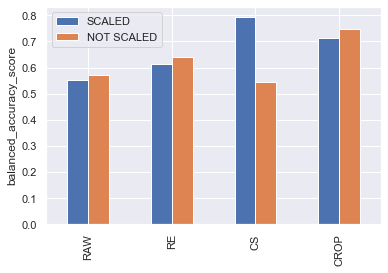

In [20]:
# Answer to question 2.6
# The best representation is CS SCALED
joint_results.plot.bar()
plt.ylabel(sklearn_metric.__name__)

## Step 2: Indentify the best model
We are now ready to perform systematic experiments on various models. We will use the methods proposed in the variable `classifiers` of <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">these scikit-learn examples</a>, compare classifier performances on the dataset `CS_SCALED`:

<u>Question 3.1:</u> Create a variable `data_df` and assign to it the data frame of the scaled version of the CS dataset.

<u>Question 3.2:</u> Create a variable `model_name` and a variable `model_list` containing the list of model names and the list of models (classifiers) from the <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">the scikit-learn examples</a> we pointed you to.

<u>Question 3.3:</u> Call `systematic_model_experiment(data_df, model_name, model_list, sklearn_metric)` and display the results. 

<u>Question 3.4:</u>
Which method performs best? <b>Tip:</b> Use <a href="https://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.Series.argmax.html">argmax</a>.

<u>Question 3.5:</u> <b> Overfitting and underfitting.</b> There may be two reasons why a model performs poorly. It could either be <b>overfitting</b> or <b>underfitting</b> data. If the test performance is bad but the trainign performance is good, the model is overfitting. If both are bad, the model is under-fitting. 
1. Find which models have TEST performance UNDER THE MEDIAN test performance. 
2. Of those, we will say that models with TRAINING performance UNDER THE MEDIAN training performance are under-fitted, while those with TRAINING performance OVER THE MEDIAN are over-fitted.

Which models are over-fitted and which ones are under-fitted?

In [21]:
# Answer to question 3.1
data_df = all_scaled_data_df[2]

In [22]:
# Answer to question 3.2
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model_name = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
model_list = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [23]:
# Answer to question 3.3
compar_results = systematic_model_experiment(data_df, model_name, model_list, sklearn_metric)
compar_results.style.background_gradient(cmap='Blues')

,perf_tr,std_tr,perf_te,std_te
Nearest Neighbors,0.89011,0.0181331,0.814818,0.0253943
Linear SVM,0.760862,0.0127473,0.74873,0.0134185
RBF SVM,0.999367,0.00189873,0.579652,0.0191934
Gaussian Process,0.85053,0.0323953,0.796938,0.0118428
Decision Tree,0.987433,0.0169822,0.745301,0.0268931
Random Forest,0.980833,0.0106997,0.779508,0.0132175
Neural Net,0.853176,0.0241969,0.795024,0.00900375
AdaBoost,0.999398,0.00180723,0.782627,0.0242981
Naive Bayes,0.759021,0.0176058,0.748764,0.0202091
QDA,0.840594,0.0231407,0.781661,0.0330233


In [24]:
# Answer to question 3.4
compar_results.perf_te.argmax()

'Nearest Neighbors'

In [25]:
# Answer to question 3.5
analyze_model_experiments(compar_results)

,perf_tr,std_tr,perf_te,std_te,Overfitted,Underfitted
Nearest Neighbors,0.89011,0.0181331,0.814818,0.0253943,False,False
Linear SVM,0.760862,0.0127473,0.74873,0.0134185,False,True
RBF SVM,0.999367,0.00189873,0.579652,0.0191934,True,False
Gaussian Process,0.85053,0.0323953,0.796938,0.0118428,False,False
Decision Tree,0.987433,0.0169822,0.745301,0.0268931,True,False
Random Forest,0.980833,0.0106997,0.779508,0.0132175,True,False
Neural Net,0.853176,0.0241969,0.795024,0.00900375,False,False
AdaBoost,0.999398,0.00180723,0.782627,0.0242981,False,False
Naive Bayes,0.759021,0.0176058,0.748764,0.0202091,False,True
QDA,0.840594,0.0231407,0.781661,0.0330233,False,False


Text(0, 0.5, 'balanced_accuracy_score')

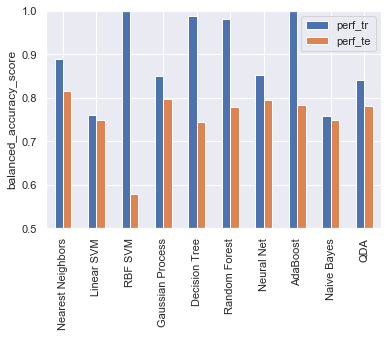

In [26]:
compar_results[['perf_tr', 'perf_te']].plot.bar()
plt.ylim(0.5, 1)
plt.ylabel(sklearn_metric.__name__)